<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%2011/MIS710_Lab11_TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 11 Week 11**
Author: Associate Professor Lemai Nguyen

Objectives: 

**Topic modelling:**
1. LDA
2. Word2Vec and K-means




# **1. Import Libraries and Functions**

Import libraries and functions that are central to this lab**

In [ ]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Case One: ChatGPT tweets**

**Topic Modelling**


**Context**

ChatGPT has reached 100 million users just two months after launching. There is a huge debate on general trends and concerns surrounding AI and language models. A diverse range of opinions and viewpoints is emerging.

**Content**

The lab dataset is a cutdown version of a kaggle dataset of 100,000 tweets in English containing the word "chatgpt" between 2023-03-18 and 2023-03-21.

The Lab dataset consists of Processed tweet and Sentiment lables.

**Inspiration**

Applying topic modelling on datasets like Tweets can provide valuable insights into the opinions and attitudes towards ChatGPT. It's not uncommon for opinions to be divided or for individuals to have mixed feelings about a new technology or innovation.

**Data source**:

https://www.kaggle.com/datasets/sanlian/tweets-about-chatgpt-march-2023


## **4.1 Data Loading**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/chatgpt-tweets.csv'


In [ ]:
# load dataset
records = pd.read_csv(url, index_col=None)

In [ ]:
records.head()

,processed_tweet,sentiment_label
0,chatgpt is another woke machine.,negative
1,"of the atlantic, or only near the atla more to...",neutral
2,this thread is saved to your notion database. ...,neutral
3,prompt ai – chatgpt,neutral
4,just had some interesting conversations with g...,positive


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80501 entries, 0 to 80500
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processed_tweet  80500 non-null  object
 1   sentiment_label  80501 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## **4.2. Text and Languistic Preprocessing

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


**Detect missing data**

In [ ]:
records.isnull().sum()

processed_tweet    1
sentiment_label    0
dtype: int64

In [ ]:
# Drop rows with missing data in the 'Age' column
records.dropna(subset=['processed_tweet'], inplace=True)

In [ ]:
records.isnull().sum()

processed_tweet    0
sentiment_label    0
dtype: int64

### **EDA**

* Analyse and visualise the sentiment column

In [ ]:
# Get frequency of positive and negative reviews
sentiment_counts = records['sentiment_label'].value_counts()
print(sentiment_counts)

neutral     40618
negative    20911
positive    18971
Name: sentiment_label, dtype: int64


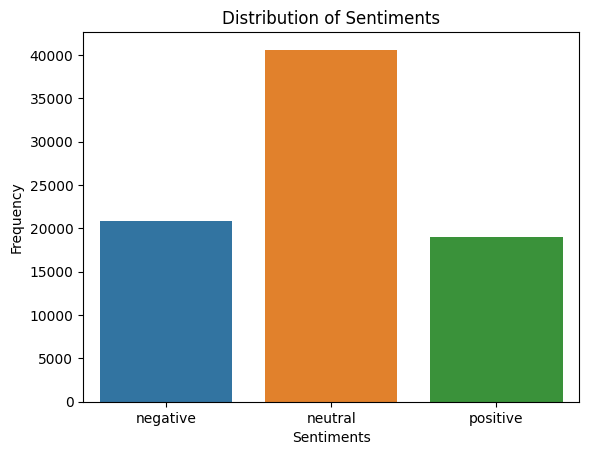

In [ ]:
# Plot bar chart of sentiment counts
sns.countplot(data=records, x='sentiment_label')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.show()

### **Text pre-processing**
* Text cleaning: Remove any HTML tags, punctuation, and special characters from the reviews.
* Lowercasing: Convert all text to lowercase to ensure that words with the same spelling but different capitalization are treated as the same word.
* Tokenization: Split the text into individual words or tokens.
* Stopword removal: Remove common words such as "the", "and", "a", etc. that do not add much meaning to the text.
* Stemming/Lemmatization: Reduce words to their base form to normalize the text and group together words with similar meanings.

re is a built-in Python module for working with regular expressions. Regular expressions are a combination of alphanumeric characters and special characters. For example, the . character in a regular expression matches any single character, while the * character matches zero or more occurrences of the preceding character.

#### **Text cleaning**

In [ ]:
import re

The re.sub() method takes three arguments:

1.   The regular expression pattern to search for.
2.   The replacement string to use for each match of the pattern.
3. The input string to perform the substitution on.

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  # Remove the string 'nan' from column "Text", as we merged columns with missing texts together
  text = re.sub(r'nan', '', text)
  return text

* The . (dot) metacharacter matches any single character except for a newline character. 
* The * (asterisk) metacharacter matches zero or more occurrences of the preceding character or group. 

* \w matches any word character, which  includes all alphabetic characters (both upper- and lowercase) and digits, and the underscore character.

* \s matches any whitespace character, which includes spaces, tabs, newlines, and other types of whitespace.

* \s+ matches one or more consecutive whitespace characters. The + (plus) is a metacharacter that means "one or more occurrences of the preceding pattern".

**Task 13:** Write code for records['Review'] to apply clean_text

In [ ]:
# Apply the clean_text function to the 'review' column 
records['processed_tweet'] = records['processed_tweet'].apply(clean_text)

In [ ]:
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

**Task 14:** Write code for records['Review'] to apply lowercasing

In [ ]:
records['processed_tweet']=records['processed_tweet'].apply(lowercasing)

#### **Tokenization, Stemming and Lemmatization**

* Tokenization breaks the text into individual words or tokens, and then stemming/lemmatization is applied on each token individually to obtain their root form.

* Stemming can help in reducing  words to their root form, which can help in reducing the number of unique words and therefore reducing the size of the vocabulary. For example: studies, study, studied, studying -> study

* Lemmatization reduces a word to its base or dictionary form, which can improve the accuracy of the analysis. By doing both stemming and lemmatization, we can get the benefits of both techniques and improve the overall performance of the sentiment analysis model.

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

Punkt and WordNet are both modules in the Natural Language Toolkit (nltk) library in Python for natural language processing tasks.

* Punkt is a module used for tokenization. The Punkt module is trained on large corpora and uses unsupervised learning algorithms to tokenize sentences effectively even when presented with challenging text.

* WordNet is a large lexical database of English words for lemmatization.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Get stopwords
stop_words = set(stopwords.words('english'))
#keep negation words because removing them may result in information loss
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}

filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming and lemmatization
def tokenize_stem(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())
    
  #initialize stemmer and lemmatizer  
  stemmer = PorterStemmer()
  #lemmatizer = WordNetLemmatizer()

  #perform stemming and lemmatization 
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  #lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in filtered_words and token.lower() not in negation_words]
  #return ' '.join(lemmatized_tokens)
  return stemmed_tokens

In [ ]:
# Tokenize and stem. It might take one minute or two.
processed_text = records['processed_tweet'].apply(tokenize_stem)


## **4.3 Sentiment analysis**
Do it yourself

## **4.4 Topic modelling using LDA**

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

In [ ]:
# Create a list of preprocessed reviews
preprocessed_text = processed_text.tolist()

In [ ]:
# Join the preprocessed_text to convert it into a list of strings
preprocessed_text = [' '.join(tokens) for tokens in preprocessed_text]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Create the document-term matrix using TF-IDF vectorization
vectorizer = TfidfVectorizer()
doc_term_matrix = vectorizer.fit_transform(preprocessed_text)


Let's find 20 topics based on TF-IDF of tokens. Note, it takes several minutes. 

In [ ]:
# Define the number of topics
num_topics = 20

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=2023)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=20, random_state=2023)

In [ ]:
#Check the size of our model components.
lda_model.components_.shape

(20, 36358)

In [ ]:
# Print the topics and their top words
feature_names = vectorizer.get_feature_names_out() 
for topic_id, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {topic_id + 1}: {' '.join(top_words)}")

Topic 1: chatgpt rsi morn the price to good is recommend and
Topic 2: it the to chatgpt and is of you that for
Topic 3: chatgpt free for the predict to it all week and
Topic 4: to the chatgpt it and of for use you write
Topic 5: gpt4 arb chatgpt and is the to episod park gpt
Topic 6: chatgpt down is to googl it bard the plu for
Topic 7: chatgpt congrat prompt appl is watch gpt4 on the magic
Topic 8: the and to of ai chatgpt in for with your
Topic 9: chatgpt the to ban my for gm in copi escap
Topic 10: chatgpt outag via lab for sale colleg report major pm
Topic 11: chatgpt the is to game my lol use it me
Topic 12: chatgpt the na to exam is of gon emo_po secur
Topic 13: ask chatgpt to the is and it for you in
Topic 14: chatgpt the to it is and of for in kill
Topic 15: it chatgpt the to is and you of that in
Topic 16: thank you chatgpt to your thread save thi tag tweet
Topic 17: the to chatgpt and is of it in you for
Topic 18: sourc rival chatgpt bard googl to launch open over18 earli
Top

In [ ]:
 # Find the top 5 tweets and labels associated with each topic
topic_tweets = []
topic_labels = []
topic_probabilities = lda_model.transform(doc_term_matrix)[:, topic_id]
top_tweets_indices = topic_probabilities.argsort()[:-6:-1]
for tweet_index in top_tweets_indices:
  topic_tweets.append(records['processed_tweet'][tweet_index])
  topic_labels.append(records['sentiment_label'][tweet_index])
    

In [ ]:
# Print the top tweets and labels for the current topic
for tweet, label in zip(topic_tweets, topic_labels):
  print(f"Tweet: {topic_tweets}")
  print(f"Label: {topic_labels}")
  print()

Tweet: ['dude has no conception of the indomitable joy of being a biological father yet claims to be changing diapers this should be illegal', 'filthy fi either you are shameless to the lowest level or your bot is developed to be so intelligent it looks decades outdated with ai tools like chatgpt available now or you are trying to irritate me to the extent possible so that i will stop complaining', 'filthy fi either you are shameless to the lowest level or your bot is developed to be so intelligent it looks decades outdated with ai tools like chatgpt available now or you are trying to irritate me to the extent possible so that i will stop complaining', 'chatgpt for beginners your quick amp easy guide to mastery', 'why did i subscribed to and why you should too as explained by chatgpt if youre an avid twitter user you may have heard about twitter blue a new subscription service that offers premium features for a monthly fee if youre on the fence about whether to']
Label: ['negative', 'n

Let's combinate the following steps. The following code may take several minutes. 

In [ ]:
for topic_id, topic in enumerate(lda_model.components_):
  top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
  print(f"Topic {topic_id + 1}: {' '.join(top_words)}")
  print("Top Reviews and Labels:")
    
  # Find the top 5 tweets and labels associated with the current topic
  topic_tweets = []
  topic_labels = []
  topic_probabilities = lda_model.transform(doc_term_matrix)[:, topic_id]
  top_tweets_indices = topic_probabilities.argsort()[:-6:-1]
  for tweet_index in top_tweets_indices:
    topic_tweets.append(records['processed_tweet'][tweet_index])
    topic_labels.append(records['sentiment_label'][tweet_index])
    
  # Print the top tweets and labels for the current topic
  for tweet, label in zip(topic_tweets, topic_labels):
    print(f"Tweet: {topic_tweets}")
    print(f"Label: {topic_labels}")
    print()
        
  print("----------------------")

Topic 1: chatgpt rsi morn the price to good is recommend and
Top Reviews and Labels:
Tweet: ['the term nft is too technical we need to rebrand them as digital collectibles meanwhile mfers saying chatgpt a million times in the media and daily conversation and i literally dont know what gpt even stands for spoiler it stands for generative pretrained transformer', 'the current regime is burdensome for consumers and creates disincentives to providing data did chatgpt write that line surprised nothing on safety tech the exdcms and home office big pitch to g7 useful parallel reading incl dronesemerging tech', 'using chatgpt for job search now at this point', 'tried to get chatgpt to do my shopping list and meal planning for the week based on a list of meals wed had over the past month it planned in pizza for three consecutive days', 'haiku take on the pentateuch genesis in the beginning god created all that is life earth and heaven exodus moses led the way from egypt to promised land through

## **4.5 Using Word2Vec and clustering**

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [ ]:
tokenized_tweets = processed_text

In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_tweets, window=5, min_count=1)

# Get the tweet embeddings
#tweet_embeddings = [word2vec_model.wv[tokens] for tokens in tokenized_tweets]



In [ ]:
# Get the tweet embeddings
tweet_embeddings = []
for tokens in tokenized_tweets:
    # Compute the average of word vectors for each tweet
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        tweet_embeddings.append(np.mean(embeddings, axis=0))
    else:
        # Handle the case when there are no valid word vectors for a tweet
        tweet_embeddings.append(np.zeros(word2vec_model.vector_size))

tweet_embeddings = np.array(tweet_embeddings)

In [ ]:
# Perform clustering on tweet embeddings (using K-means as an example)
num_clusters = 10  # Adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tweet_embeddings)

# Assign cluster labels to each tweet
records['cluster_label'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Count positive, negative, and neutral labels for each cluster
label_counts = records.groupby('cluster_label')['sentiment_label'].value_counts().unstack(fill_value=0)


In [ ]:
# Print the tweets in each cluster
for cluster_id in range(num_clusters):
    cluster_tweets = records[records['cluster_label'] == cluster_id]['processed_tweet']
    sample_tweets = cluster_tweets.sample(n=10, random_state=2023)
    print(f"Cluster {cluster_id + 1} - Number of tweets: {len(cluster_tweets)}")
    #for tweet in cluster_tweets:
     #   print(tweet)
    print(f"Positive: {label_counts.loc[cluster_id, 'positive']}")
    print(f"Negative: {label_counts.loc[cluster_id, 'negative']}")
    print(f"Neutral: {label_counts.loc[cluster_id, 'neutral']}")
    for tweet in sample_tweets:
        print(tweet)
    print("----------------------")


Cluster 1 - Number of tweets: 16892
Positive: 3492
Negative: 6745
Neutral: 6655
even recognizes your lies it is important to note that the statement you provided is a political opinion and opinions can be subjective and vary among individuals additionally it is important to critically evaluate sources of information and 1
i think its so insanely cool how if chatgpt doesnt know how to program something like a lot playdate stuff for example i can literally just paste in a bit of the official playdate sdk documentation and now it knows how to program it
i gave chatgpt mar version sallyanne test in japanese it answered the test correctly i asked it if it knew the test and it said it did
it may also be that you are too good at google search keywords to notice the quality differential for me half of google search results are seospam results which is frustrating vs a clean immediate result from chatgpt
honestly at this point i think that 99 of the ai saas are just making calls to the chatgpt 

<ipython-input-65-6f782d1f67ca>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cluster_labels, rotation=45, ha='right')


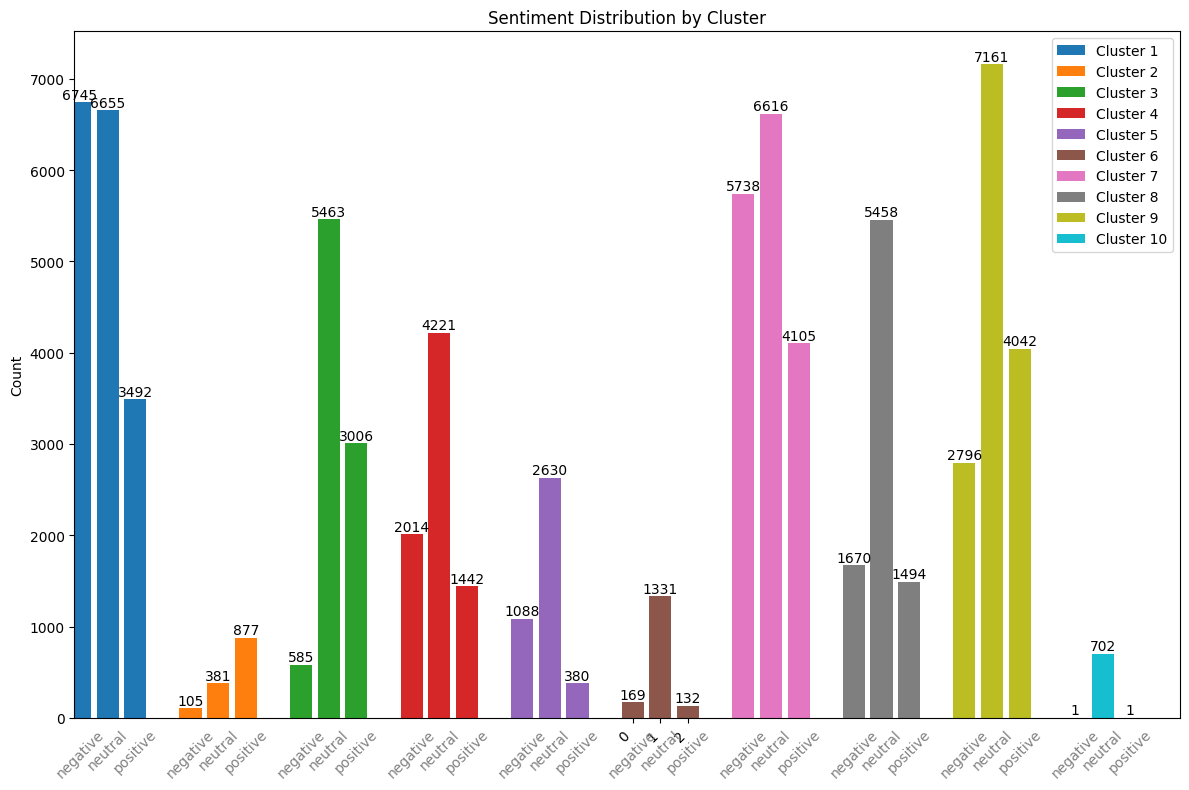

In [ ]:
# Plot the distributions of positive, negative, and neutral tweets in each cluster
sentiment_labels = ['negative', 'neutral', 'positive']
cluster_labels = range(num_clusters)

# Set up the figure and subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the bar width and the offset for each cluster
bar_width = 0.2
offset = bar_width * (len(sentiment_labels) - 1) / 2

# Iterate over clusters
for cluster_id in cluster_labels:
    # Get the label counts for the cluster
    cluster_label_counts = label_counts.loc[cluster_id]
    counts = cluster_label_counts.values

    # Compute the x-axis positions
    x_pos = np.arange(len(sentiment_labels)) + cluster_id * (len(sentiment_labels) + 1)

    # Plot the bar chart
    ax.bar(x_pos, counts, align='center', label=f'Cluster {cluster_id + 1}')
    ax.set_xticklabels(cluster_labels, rotation=45, ha='right')

    # Add labels for each bar
    for i, count in enumerate(counts):
        ax.text(x_pos[i], count + 5, str(count), ha='center', va='bottom')

    # Add cluster label
    #ax.text(np.mean(x_pos), max(counts) + 30, f'Cluster {cluster_id + 1}', ha='center', va='bottom', fontweight='bold')

     # Add bar names
    for i, sentiment_label in enumerate(sentiment_labels):
        ax.text(x_pos[i], -100, sentiment_label, ha='center', va='top', rotation=45, color='gray')
        
# Set the x-axis limits and ticks
ax.set_xlim(-offset, (len(sentiment_labels) + 1) * num_clusters - offset)
ax.set_xticks(np.arange(len(sentiment_labels)) + (len(sentiment_labels) + 1) * num_clusters / 2)
#ax.set_xticklabels(sentiment_labels, rotation=45, ha='right')
#ax.set_xlabel('Sentiment Label')



# Set the y-axis label
ax.set_ylabel('Count')

# Set the title and legend
ax.set_title('Sentiment Distribution by Cluster')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()